In [3]:
import elementpath
from xml.etree import ElementTree
import manga109api
from os import listdir
from numpy import zeros, asarray, expand_dims, mean
from numpy import asarray
from mrcnn.utils import Dataset, extract_bboxes, compute_ap
from mrcnn.config import Config
from mrcnn.visualize import display_instances
from mrcnn.model import MaskRCNN, load_image_gt, mold_image
import matplotlib.pyplot as pyplot
from matplotlib.patches import Rectangle, Arrow
import math
import cv2

In [4]:

root_dir = "D:\\python_code\\Project-Fugu-Manga-Translator\\datasets\\Manga109\\Manga109_released_2021_12_30\\"
p = manga109api.Parser(root_dir=root_dir)

In [4]:
%cd ../datasets/Manga109/
%mkdir content

D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109


A subdirectory or file content already exists.


In [5]:

for book in p.books:
  tree = ElementTree.parse(root_dir + "annotations/" + book + ".xml")
  root = tree.getroot()

  %mkdir D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\$book
  %cd D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\$book

  for page in root.findall(".//page"):
    new_xml = page
    b_xml = ElementTree.tostring(new_xml)
    with open("new_" + book + str(page.attrib["index"]) + ".xml", "wb") as f:
      f.write(b_xml)

D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\ARMS


A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\ARMS already exists.


D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\AisazuNihaIrarenai


A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\AisazuNihaIrarenai already exists.


D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\AkkeraKanjinchou


A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\AkkeraKanjinchou already exists.
A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\Akuhamu already exists.


D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\Akuhamu


A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\AosugiruHaru already exists.


D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\AosugiruHaru


A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\AppareKappore already exists.


D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\AppareKappore
D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\Arisa


A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\Arisa already exists.
A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\BEMADER_P already exists.


D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\BEMADER_P
D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\BakuretsuKungFuGirl


A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\BakuretsuKungFuGirl already exists.
A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\Belmondo already exists.


D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\Belmondo
D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\BokuHaSitatakaKun


A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\BokuHaSitatakaKun already exists.


D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\BurariTessenTorimonocho


A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\BurariTessenTorimonocho already exists.
A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\ByebyeC-BOY already exists.


D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\ByebyeC-BOY


A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\Count3DeKimeteAgeru already exists.


D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\Count3DeKimeteAgeru
D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\DollGun


A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\DollGun already exists.


D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\Donburakokko


A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\Donburakokko already exists.


D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\DualJustice


A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\DualJustice already exists.
A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\EienNoWith already exists.


D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\EienNoWith


A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\EvaLady already exists.


D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\EvaLady
D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\EverydayOsakanaChan


A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\EverydayOsakanaChan already exists.
A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\GOOD_KISS_Ver2 already exists.


D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\GOOD_KISS_Ver2


A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\GakuenNoise already exists.


D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\GakuenNoise


A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\GarakutayaManta already exists.


D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\GarakutayaManta
D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\GinNoChimera


A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\GinNoChimera already exists.


D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\Hamlet


A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\Hamlet already exists.


D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\HanzaiKousyouninMinegishiEitarou


A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\HanzaiKousyouninMinegishiEitarou already exists.


D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\HaruichibanNoFukukoro


A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\HaruichibanNoFukukoro already exists.


D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\HarukaRefrain


A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\HarukaRefrain already exists.


D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\HealingPlanet


A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\HealingPlanet already exists.
A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\HeiseiJimen already exists.


D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\HeiseiJimen


A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\HighschoolKimengumi_vol01 already exists.


D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\HighschoolKimengumi_vol01


A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\HighschoolKimengumi_vol20 already exists.


D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\HighschoolKimengumi_vol20
D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\HinagikuKenzan


A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\HinagikuKenzan already exists.
A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\HisokaReturns already exists.


D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\HisokaReturns


A subdirectory or file D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\JangiriPonpon already exists.


D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\JangiriPonpon
D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\JijiBabaFight
D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\Joouari
D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\Jyovolley
D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\KarappoHighschool
D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\KimiHaBokuNoTaiyouDa
D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\KoukouNoHitotachi
D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\KuroidoGanka
D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\KyokugenCyclone
D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\LancelotFullThrottle
D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\LoveHina_vol01
D:\python_code\Project-Fugu-Manga-Translator\datase

In [ ]:
for book in p.books:
  string = "Compress-Archive -Path D:\\python_code\\Project-Fugu-Manga-Translator\\datasets\\Manga109\\content\\" + book + " D:\\python_code\\Project-Fugu-Manga-Translator\\datasets\\Manga109\\content\\" + book +".zip"
  print(string)
  !powershell -command $string

^C
Compress-Archive -Path D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\AkkeraKanjinchouD:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\AkkeraKanjinchou.zip
^C
Compress-Archive -Path D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\AkuhamuD:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\Akuhamu.zip
^C
Compress-Archive -Path D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\AosugiruHaruD:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\AosugiruHaru.zip
^C
Compress-Archive -Path D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\AppareKapporeD:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\AppareKappore.zip
^C
Compress-Archive -Path D:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\ArisaD:\python_code\Project-Fugu-Manga-Translator\datasets\Manga109\content\Arisa.zip
^C
Compress-Archive -Path D:\

In [5]:
class MangaDataset(Dataset):
  def load_dataset(self, is_train=True):
    # self.add_class("dataset", 1, "face")
    self.add_class("dataset", 2, "text")
    self.add_class("dataset", 3, "frame")

    last_image_id = 0

    for book in sorted(p.books):
      images_dir = root_dir + "images/" + book + "/"
      annotations_dir = "D:\\python_code\\Project-Fugu-Manga-Translator\\datasets\\Manga109\\content/" + book + "/"

      for img in sorted(listdir(images_dir)):
        og_image_id = int(img[:-4])
        image_id = int(img[:-4]) + last_image_id

        tree = ElementTree.parse(annotations_dir + "new_" + book + str(og_image_id) + ".xml")
        root = tree.getroot()
        faces = []
        texts = []
        frames = []

        for face in root.findall(".//face"):
          faces.append(face)

        for text in root.findall(".//text"):
          texts.append(text)

        for frame in root.findall(".//frame"):
          frames.append(frame)

        if (not faces) or (not texts) or (not frames):
          continue

        if is_train and og_image_id >= 50:
          continue

        if not is_train and og_image_id < 50:
          continue

        img_path = images_dir + img
        ann_path = annotations_dir + "new_" + book + str(og_image_id) + ".xml"

        self.add_image("dataset", image_id=image_id, path=img_path, annotation=ann_path, class_ids=[0, 1, 2, 3])

      last_image_id = image_id + 1


  def extract_boxes(self, filename):
    tree = ElementTree.parse(filename)
    root = tree.getroot()
    boxes = []

    for box in root.findall(".//face"):
      continue
      att = box.attrib
      xmin = att["xmin"]
      ymin = att["ymin"]
      xmax = att["xmax"]
      ymax = att["ymax"]
      coors = [xmin, ymin, xmax, ymax, "face"]
      boxes.append(coors)

    for box in root.findall(".//text"):
      att = box.attrib
      xmin = att["xmin"]
      ymin = att["ymin"]
      xmax = att["xmax"]
      ymax = att["ymax"]
      coors = [xmin, ymin, xmax, ymax, "text"]
      boxes.append(coors)

    for box in root.findall(".//frame"):
      att = box.attrib
      xmin = att["xmin"]
      ymin = att["ymin"]
      xmax = att["xmax"]
      ymax = att["ymax"]
      coors = [xmin, ymin, xmax, ymax, "frame"]
      boxes.append(coors)

    page_att = root.attrib
    width = int(page_att["width"])
    height = int(page_att["height"])

    return boxes, width, height


  def load_mask(self, image_id):
    info = self.image_info[image_id]
    path = info["annotation"]
    boxes, w, h = self.extract_boxes(path)

    masks = zeros([h, w, len(boxes)], dtype="uint8")

    class_ids = []

    for i in range(len(boxes)):
      box = boxes[i]
      row_s, row_e = box[1], box[3]
      col_s, col_e = box[0], box[2]

      if box[4] == "face":
        continue
        masks[int(row_s):int(row_e), int(col_s):int(col_e), i] = 1
        class_ids.append(self.class_names.index("face"))

      elif box[4] == "text":
        masks[int(row_s):int(row_e), int(col_s):int(col_e), i] = 2
        class_ids.append(self.class_names.index("text"))

      elif box[4] == "frame":
        masks[int(row_s):int(row_e), int(col_s):int(col_e), i] = 3
        class_ids.append(self.class_names.index("frame"))

    return masks, asarray(class_ids, dtype="int32")


  def image_reference(self, image_id):
    info = self.image_info[image_id]
    return info["path"]

In [6]:
train_set = MangaDataset()
train_set.load_dataset(is_train=True)
train_set.prepare()
print("Train: %d" % len(train_set.image_ids))

Train: 5048


In [7]:
# test/val set
test_set = MangaDataset()
test_set.load_dataset(is_train=False)
test_set.prepare()
print("Test: %d" % len(test_set.image_ids))

Test: 4855


In [6]:
# load an image and mask
image_id = 1
image = test_set.load_image(image_id)
print(image.shape)

mask, class_ids = test_set.load_mask(image_id)
print(mask.shape)

(1170, 1654, 3)
(1170, 1654, 29)


In [8]:
class MangaConfig(Config):
  NAME = "manga_cfg"
  NUM_CLASSES = 1 + 2
  STEPS_PER_EPOCH = 1000

  TRAIN_ROIS_PER_IMAGE = 128
  IMAGES_PER_GPU = 1
  BACKBONE = "resnet50"

  GPU_COUNT = 1

In [9]:
config = MangaConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [10]:
import matplotlib.pyplot as plt
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.

    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [10]:
model = MaskRCNN(mode="training", model_dir="model", config=config)

model.load_weights("D:\python_code\Project-Fugu-Manga-Translator\model-weights\mask_rcnn_coco.h5",
                   by_name=True,
                   exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])

model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=3, layers="all")

# config.LEARNING_RATE = 0.001


Starting at epoch 0. LR=0.001

Checkpoint Path: model\manga_cfg20220212T1846\mask_rcnn_manga_cfg_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D)
bn3a_branch2b          (B

E:\Anaconda\envs\Project-Fugu-Manga-Translator\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/3


E:\Anaconda\envs\Project-Fugu-Manga-Translator\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("training/SGD/gradients/gradients/roi_align_classifier/concat_grad/sub:0", shape=(None,), dtype=int32), values=Tensor("training/SGD/gradients/gradients/roi_align_classifier/concat_grad/GatherV2_2:0", shape=(None, 7, 7, 256), dtype=float32), dense_shape=Tensor("training/SGD/gradients/gradients/roi_align_classifier/concat_grad/Shape:0", shape=(4,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
E:\Anaconda\envs\Project-Fugu-Manga-Translator\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("training/SGD/gradients/gradients/roi_align_classifier/concat_grad/sub_1:0", shape=(None,), dtype=int32), values=Tensor("training/SGD/gradients/gradients/roi_al

1000/1000 [==============================] - ETA: 0s - batch: 499.5000 - size: 1.0000 - loss: 2.7304 - rpn_class_loss: 0.3813 - rpn_bbox_loss: 0.9385 - mrcnn_class_loss: 0.4386 - mrcnn_bbox_loss: 0.5267 - mrcnn_mask_loss: 0.4455

E:\Anaconda\envs\Project-Fugu-Manga-Translator\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1000/1000 [==============================] - 1644s 2s/step - batch: 499.5000 - size: 1.0000 - loss: 2.7304 - rpn_class_loss: 0.3813 - rpn_bbox_loss: 0.9385 - mrcnn_class_loss: 0.4386 - mrcnn_bbox_loss: 0.5267 - mrcnn_mask_loss: 0.4455 - val_loss: 1.9944 - val_rpn_class_loss: 0.1749 - val_rpn_bbox_loss: 0.6400 - val_mrcnn_class_loss: 0.4296 - val_mrcnn_bbox_loss: 0.3675 - val_mrcnn_mask_loss: 0.3825
Epoch 2/3
1000/1000 [==============================] - 1610s 2s/step - batch: 499.5000 - size: 1.0000 - loss: 1.8024 - rpn_class_loss: 0.1565 - rpn_bbox_loss: 0.5562 - mrcnn_class_loss: 0.4088 - mrcnn_bbox_loss: 0.3333 - mrcnn_mask_loss: 0.3476 - val_loss: 1.5656 - val_rpn_class_loss: 0.1434 - val_rpn_bbox_loss: 0.5106 - val_mrcnn_class_loss: 0.3317 - val_mrcnn_bbox_loss: 0.2786 - val_mrcnn_mask_loss: 0.3013
Epoch 3/3
1000/1000 [==============================] - 1587s 2s/step - batch: 499.5000 - size: 1.0000 - loss: 1.5146 - rpn_class_loss: 0.1184 - rpn_bbox_loss: 0.4727 - mrcnn_class_loss: 

In [19]:
class InferenceConfig(MangaConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    USE_MINI_MASK = True
    DETECTION_MIN_CONFIDENCE = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = MaskRCNN(mode="inference",
                          config=inference_config,
                          model_dir="model")

# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")
model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  model\manga_cfg20220212T1846\mask_rcnn_manga_cfg_0003.h5
Re-starting from epoch 3


original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
image_meta               shape: (15,)                 min:    0.00000  max: 4534.00000  float64
gt_class_id              shape: (21,)                 min:    1.00000  max:    2.00000  int32
gt_bbox                  shape: (21, 4)               min:   54.00000  max: 1020.00000  int32
gt_mask                  shape: (56, 56, 21)          min:    1.00000  max:    1.00000  bool


ValueError: operands could not be broadcast together with shapes (56,56) (1024,1024) (1024,1024) 

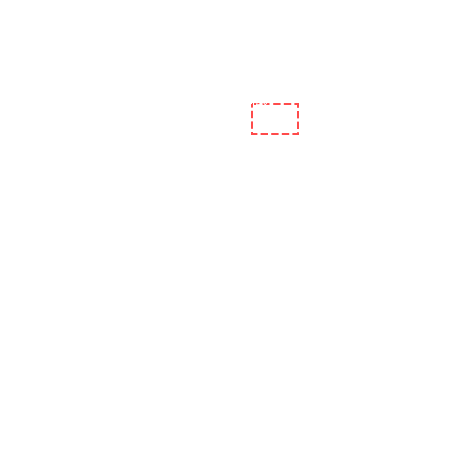

In [20]:
from mrcnn.model import log
from mrcnn import visualize
import random
# Test on a random image
image_id = random.choice(train_set.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask = load_image_gt(train_set, inference_config, image_id)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id,
                            train_set.class_names, figsize=(8, 8))

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


E:\Anaconda\envs\Project-Fugu-Manga-Translator\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


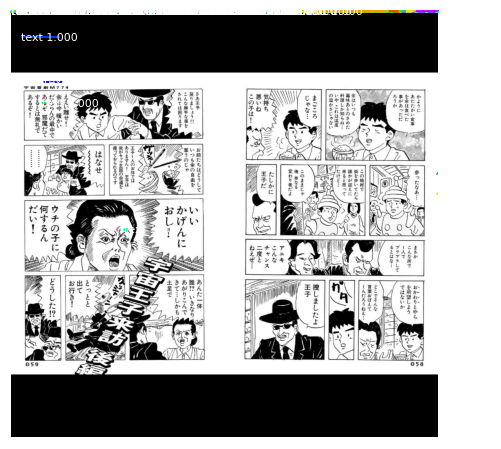

In [13]:
results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'],
                            train_set.class_names, r['scores'], ax=get_ax())

In [16]:
cfg=InferenceConfig()

In [17]:
def evaluate_model(dataset, model, cfg):
  APs = []
  for image_id in dataset.image_ids:
    image, image_meta, gt_class_id, gt_bbox, gt_mask = load_image_gt(dataset, cfg, image_id)
    scaled_image = mold_image(image, cfg)
    sample = expand_dims(scaled_image, 0)
    yhat = model.detect(sample, verbose=0)
    r = yhat[0]

    # change IoU threshold
    AP, _, _, _ = compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r["masks"], iou_threshold=0.5)
    APs.append(AP)

  mAP = mean(APs)
  return mAP

In [18]:
train_mAP = evaluate_model(train_set, model, cfg)
print("Train mAP: %.3f" % train_mAP)

TypeError: load_image_gt() got an unexpected keyword argument 'use_mini_mask'